<a href="https://colab.research.google.com/github/kojeda603/ciencia_datos_2025/blob/main/08_Clase_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##1. Definición de conceptos
1.1 Varianza  
1.2 Desviación estándar  
1.3 Desviación de la media absoluta  
1.4 Desviación abloluta mediana de la mediana (MAD)  
1.5 Rango  
1.6 Estadística ordinal  
1.7 Percentil  
1.8 Rango intercuartil (IQR)

## 1. Definición de conceptos

### 1.1 Varianza  
La **varianza** mide cuánto se dispersan los datos respecto a la media.  
Fórmula:  
  $$[sigma^2 = \frac{\sum (x_i - \bar{x})^2}{n}]$$
Si la varianza es grande → los datos están muy dispersos.  
Si es pequeña → los datos están cerca de la media.  

---

### 1.2 Desviación estándar  
Es la **raíz cuadrada de la varianza**.  
$$[sigma = \sqrt{\sigma^2}]$$
Tiene las mismas unidades que los datos.  
Ejemplo: si mides alturas en cm, la desviación estándar también será en cm.  

---

### 1.3 Desviación de la media absoluta (MAD media)  
$$[MAD = \frac{\sum |x_i - \bar{x}|}{n}]$$  
Es la media de las distancias absolutas de los datos a la **media**.  
Es más robusta ante valores extremos que la varianza.  

---

### 1.4 Desviación absoluta mediana de la mediana (MAD robusto)  
$$[MAD_{mediana} = \text{mediana}(|x_i - \text{mediana}(x)|)]$$  
Usa la **mediana** en vez de la media.  
Es aún más resistente a valores atípicos.  

---

### 1.5 Rango  
$$[R = x_{max} - x_{min}]$$  
Diferencia entre el valor máximo y el mínimo.  
Muy sensible a outliers.  

---

### 1.6 Estadística ordinal  
Se refiere a los **valores ordenados** de los datos.  
Ejemplos: mínimo, máximo, percentiles, cuartiles, mediana.  
Base de medidas como el rango intercuartílico.  

---

### 1.7 Percentil  
El **percentil p** es el valor por debajo del cual está el **p% de los datos**.  
Ejemplo: el percentil 25 (P25) deja el 25% de los datos por debajo.  
El percentil 50 es la mediana.  

---

### 1.8 Rango intercuartil (IQR)  
$$[IQR = Q3 - Q1]$$  
Donde \(Q1\) es el cuartil 1 (percentil 25) y \(Q3\) el cuartil 3 (percentil 75).  
Mide la dispersión del **50% central de los datos**.  
Útil para detectar outliers:  
  $$[text{Outlier si } x < Q1 - 1.5\cdot IQR \text{ o } x > Q3 + 1.5\cdot IQR]$$

In [ ]:
!pip install wquantiles

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels import robust
import wquantiles




In [ ]:
data=pd.read_csv('/content/drive/MyDrive/state.csv')
data.head()

,State,Population,Murder.Rate,Abbreviation
0,Alabama,4779736,5.7,AL
1,Alaska,710231,5.6,AK
2,Arizona,6392017,4.7,AZ
3,Arkansas,2915918,5.6,AR
4,California,37253956,4.4,CA


In [ ]:
data.tail()

,State,Population,Murder.Rate,Abbreviation
45,Virginia,8001024,4.1,VA
46,Washington,6724540,2.5,WA
47,West Virginia,1852994,4.0,WV
48,Wisconsin,5686986,2.9,WI
49,Wyoming,563626,2.7,WY


In [ ]:
mayor_poblacion=data.groupby(["Population"])["State"].max()
mayor_poblacion

,State
Population,
563626,Wyoming
625741,Vermont
672591,North Dakota
710231,Alaska
814180,South Dakota
897934,Delaware
989415,Montana
1052567,Rhode Island
1316470,New Hampshire


In [ ]:
data.describe()

,Population,Murder.Rate
count,5.000000e+01,50.000000
mean,6.162876e+06,4.066000
std,6.848235e+06,1.915736
min,5.636260e+05,0.900000
25%,1.833004e+06,2.425000
50%,4.436370e+06,4.000000
75%,6.680312e+06,5.550000
max,3.725396e+07,10.300000


In [ ]:
#Calcular desviacion estandar y cuantiles
data["Population"].std()

6848235.347401142

In [ ]:
#std de Murder.Rate
data["Murder.Rate"].std()

1.915736124302923

In [ ]:
#Calcular IQR Population
data["Population"].quantile(0.75)-data.Population.quantile(0.25)

np.float64(4847308.0)

In [ ]:
#Calcular IQR Murder.Rate
data["Murder.Rate"].quantile(0.75)-data["Murder.Rate"].quantile(0.25)

np.float64(3.125)

In [ ]:
robust.scale.mad(data["Population"])

np.float64(3849876.1459979336)

In [ ]:
robust.scale.mad(data["Murder.Rate"])

np.float64(2.3721635496089624)

In [ ]:
# HINT - Trabajo con dataframes
info = {
    "Nombres": ["Camilo", "Kevin", "Santiago"],
    "Edades": [18, 15, 21],
    "Juegos": ["Basketball", "Tenis de mesa", "Fútbol"]
}

ejemplo = pd.DataFrame(info)
ejemplo

,Nombres,Edades,Juegos
0,Camilo,18,Basketball
1,Kevin,15,Tenis de mesa
2,Santiago,21,Fútbol


In [ ]:
ejemplo_df = ejemplo.rename(columns={"Juegos": "Deportes"})


In [ ]:
ejemplo_df.columns

Index(['Nombres', 'Edades', 'Deportes'], dtype='object')

In [ ]:
#### ------- REMPLAZAR HEADERS DE STATE INGLES A ESPAÑOL ----------------
data = data.rename(columns={
    "State": "Estado",
    "Population": "Población",
    "Murder.Rate": "Tasa.Homicidios",
    "Abbreviation": "Abreviatura"
})


In [ ]:
data.columns

Index(['Estado', 'Población', 'Tasa.Homicidios', 'Abreviatura'], dtype='object')

## 4. EXPLORACIÓN EN LA DISTRIBUCIÓN DE DATOS

### 4.1 Diagrama de caja
**Definición:**  
Un diagrama de caja (boxplot) resume la distribución de un conjunto de datos numéricos mostrando sus cuartiles, valores extremos y posibles atípicos.  

**Cómo se lee:**  
- La **caja** representa el 50% central de los datos (del cuartil 1 al cuartil 3).  
- La **línea dentro de la caja** es la **mediana**.  
- Los **bigotes** muestran el rango de valores sin atípicos.  
- Los **puntos aislados** representan valores atípicos.  

---

### 4.2 Diagrama de frecuencias
**Definición:**  
Es una tabla o gráfico que muestra cuántas veces aparece cada valor o intervalo de valores.  

**Cómo se lee:**  
Permite identificar en qué valores o intervalos se concentran más datos y cuáles aparecen con menor frecuencia.  

---

### 4.3 Histograma
**Definición:**  
Es una representación gráfica de las frecuencias de una variable numérica mediante barras. Cada barra representa un intervalo (bin).  

**Cómo se lee:**  
- El **eje X** son los intervalos.  
- El **eje Y** es la frecuencia o densidad.  
- Permite identificar la **forma de la distribución** (simétrica, sesgada, etc.).  

---

### 4.4 Diagrama de densidad
**Definición:**  
Es una curva continua que estima la densidad de probabilidad de los datos, proporcionando una versión suavizada del histograma.  

**Cómo se lee:**  
- El **eje X** representa los valores posibles de la variable.  
- El **eje Y** muestra la densidad estimada (se integra a 1).  
- La curva señala las zonas donde los datos se concentran más.  


In [ ]:
data["Tasa.Homicidios"].quantile([0.5,0.25,0.5,0.75,0.95])

,Tasa.Homicidios
0.50,4.000
0.25,2.425
0.50,4.000
0.75,5.550
0.95,6.510


In [ ]:
#diagrama de caja

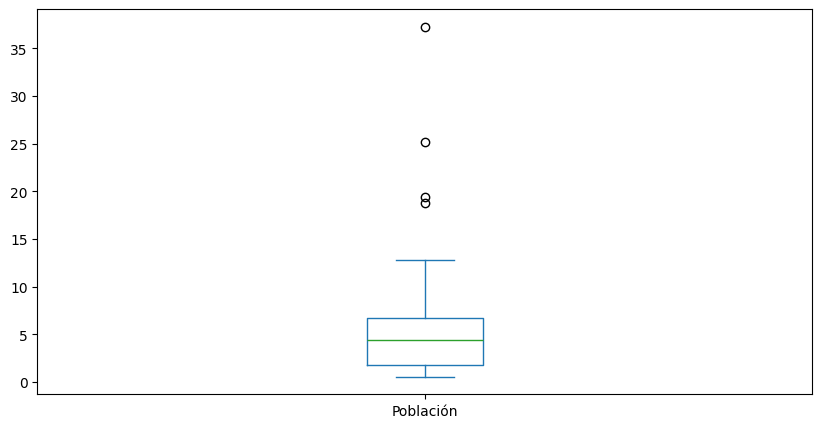

In [ ]:
ax=(data.Población/1000000).plot.box(figsize=(10,5))
ax.set_label("Población en millones")

#Explicacion con popularion y murder.rate

#EXPLICACION

Existen bastantes datos atipicos

In [ ]:
#Calcular tabla de frecuencia e histogramas
binnedPopulation=pd.cut(data["Población"],10)
binnedPopulation.value_counts()

,count
Población,
"(526935.67, 4232659.0]",24
"(4232659.0, 7901692.0]",14
"(7901692.0, 11570725.0]",6
"(11570725.0, 15239758.0]",2
"(15239758.0, 18908791.0]",1
"(18908791.0, 22577824.0]",1
"(22577824.0, 26246857.0]",1
"(33584923.0, 37253956.0]",1
"(26246857.0, 29915890.0]",0


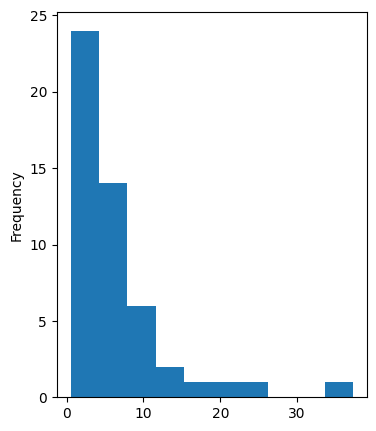

In [ ]:
ax=(data.Población/1000000).plot.hist(figsize=(4,5))
ax.set_label("Población en millones")

#Explicacion con population y murder.rate

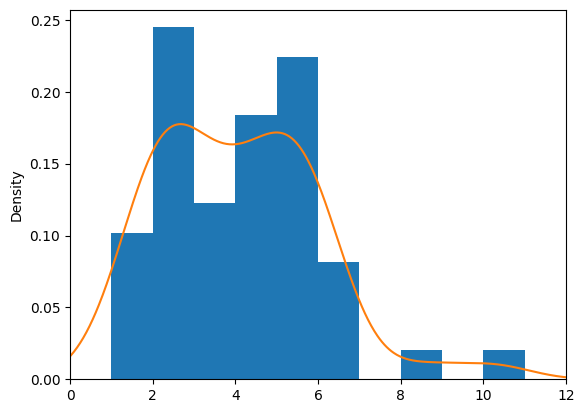

In [ ]:
#Diagrama de dispercion y curva de densidad
ax=data["Tasa.Homicidios"].plot.hist(density=True,xlim=[0,12],bins=range(1,12))
data["Tasa.Homicidios"].plot.density(ax=ax)
ax.set_label("Tasa de asesinato por 1M")
